In [392]:
import os
import pandas as pd

In [393]:
results = pd.read_json(os.path.join('data','ergast-results.json'))
wikidata_ids = pd.read_csv(os.path.join('data','wikidata_ids.csv'))
wikid = pd.read_json(os.path.join('data','wikidata.json'))

In [394]:
results = results.merge(wikidata_ids, left_on="driverUrl", right_on="driverUrl", how="outer")

In [395]:
results = results.merge(wikid, left_on="wikidata_id", right_on="wikidata_id", how="outer")

In [396]:
results['date_of_birth'] = pd.to_datetime(results['date_of_birth'])
results['date_of_death'] = pd.to_datetime(results['date_of_death'])

In [397]:
results['date'] = pd.to_datetime(results['date'])

In [398]:
living = results[results['date_of_death'].apply(lambda x: "-" not in str(x))]['full_name'].drop_duplicates().to_list()
len(living)

350

In [399]:
results[results['full_name'].isin(living)].sort_values(by='date_of_birth')[['full_name','date_of_birth','date_of_death','cause_of_death','manner_of_death']].drop_duplicates().head(20)

,full_name,date_of_birth,date_of_death,cause_of_death,manner_of_death
10877,Paul Goldsmith,1925-10-02,NaT,None,None
8956,Hermano da Silva Ramos,1925-12-07,NaT,None,None
18189,John Rhodes,1927-08-18,NaT,None,None
21621,Hans Herrmann,1928-02-23,NaT,None,None
12692,André Milhoux,1928-12-09,NaT,None,None
11273,Bernie Ecclestone,1930-10-28,NaT,None,None
10514,David Piper,1930-12-02,NaT,None,None
12673,Fred Gamble,1932-03-17,NaT,None,None
10341,Alex Soler-Roig,1932-10-29,NaT,None,None
12704,Gaetano Starrabba,1932-12-03,NaT,None,None


In [400]:
dead = results[results['date_of_death'].notnull()]['full_name'].drop_duplicates().to_list()
len(dead)

509

In [401]:
results[results['full_name'].isin(dead)][['full_name','date_of_birth','date_of_death','cause_of_death','manner_of_death']].drop_duplicates().sort_values(by='date_of_birth',ascending=False).head(50)

,full_name,date_of_birth,date_of_death,cause_of_death,manner_of_death
19366,Jules Bianchi,1989-08-03,2015-07-17,diffuse axonal injury,accidental death
7849,Justin Wilson,1978-07-31,2015-08-24,None,None
23010,Roland Ratzenberger,1960-07-04,1994-04-30,basilar skull fracture,accidental death
5592,Adrián Campos,1960-06-17,2021-01-27,None,None
2,Ayrton Senna,1960-03-21,1994-05-01,traumatic brain injury,accidental death
15925,Andrea de Cesaris,1959-05-31,2014-10-05,motorcycle accident,accidental death
16953,Riccardo Paletti,1958-06-15,1982-06-13,None,None
8559,"John Crichton-Stuart, 7th Marquess of Bute",1958-04-26,2021-03-22,None,None
15536,Elio de Angelis,1958-03-26,1986-05-15,smoke inhalation injury,None
20943,Stefan Bellof,1957-11-20,1985-09-01,None,None


In [402]:
results[results['full_name'].isin(dead)][['full_name','date_of_birth','date_of_death','cause_of_death','manner_of_death']].drop_duplicates().dropna(subset=['date_of_death']).sort_values(by='date_of_death',ascending=False)

,full_name,date_of_birth,date_of_death,cause_of_death,manner_of_death
17531,Wilson Fittipaldi Júnior,1943-12-25,2024-02-23,cardiac arrest,natural causes
20699,Alberto Colombo,1946-02-23,2024-01-07,None,None
12700,Basil van Rooyen,1939-04-19,2023-09-14,None,None
10405,Kenneth McAlpine,1920-09-21,2023-04-08,None,None
10435,Slim Borgudd,1946-11-25,2023-02-23,None,None
...,...,...,...,...,...
10510,Cecil Green,1919-09-30,1951-07-29,None,None
18236,Bill Mackey,1927-12-15,1951-07-29,None,None
10879,Walt Brown,1911-12-30,1951-07-29,None,None
9062,Raymond Sommer,1906-08-31,1950-09-10,None,None


In [403]:
results.groupby('date_of_death')['name'].nunique().nlargest(10)

date_of_death
1951-07-29    3
1960-06-19    3
1957-07-14    2
1959-08-01    2
1966-06-11    2
1975-11-29    2
1987-02-10    2
2014-05-04    2
1950-07-29    1
1950-09-10    1
Name: name, dtype: int64

In [404]:
results['life_remaining'] = results['date_of_death'] - results['date']

In [405]:
results.groupby('year')['life_remaining'].mean().nsmallest()

year
2014.0              389 days 12:48:00
2013.0    719 days 08:50:31.578947368
1994.0             3658 days 08:00:00
1993.0   3675 days 18:15:39.130434752
1992.0             4000 days 22:00:00
Name: life_remaining, dtype: timedelta64[ns]

<Axes: xlabel='year'>

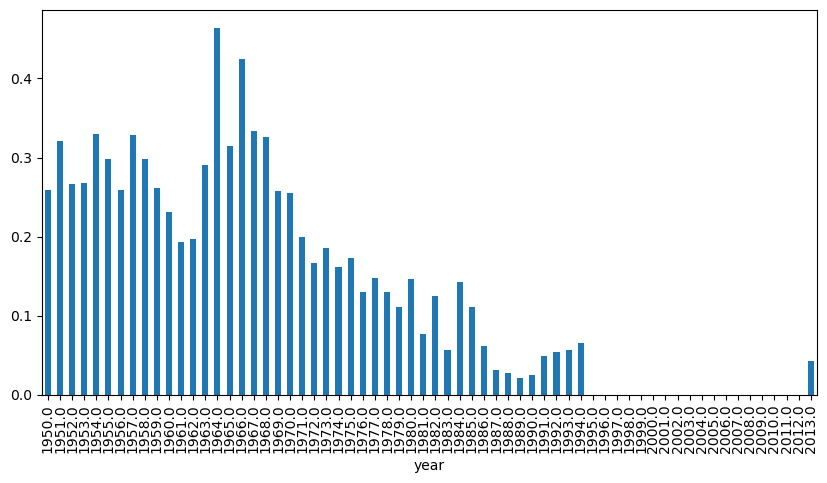

In [406]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*10), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).head(64).plot.bar(figsize=(10,5))

<Axes: xlabel='year'>

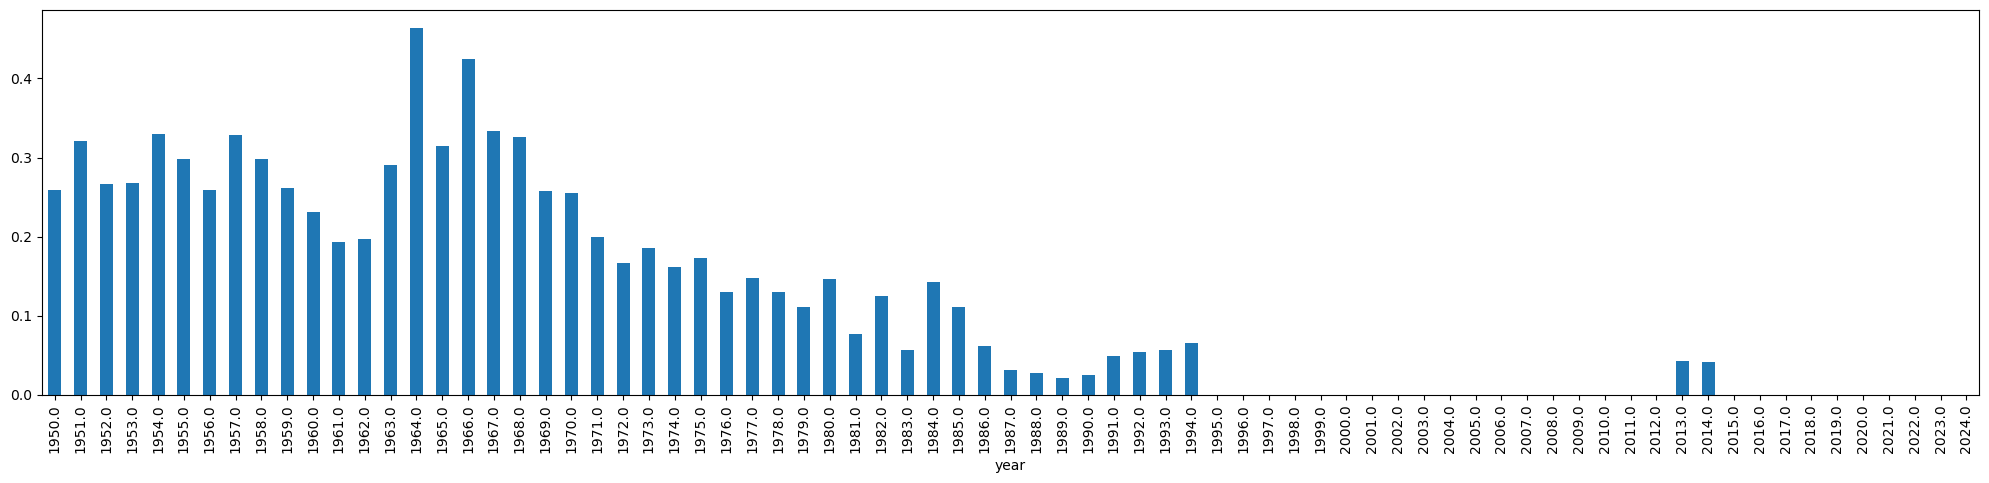

In [407]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*10), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

In [408]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*10), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).nlargest(1)

year
1964.0    0.463415
Name: name, dtype: float64

<Axes: xlabel='year'>

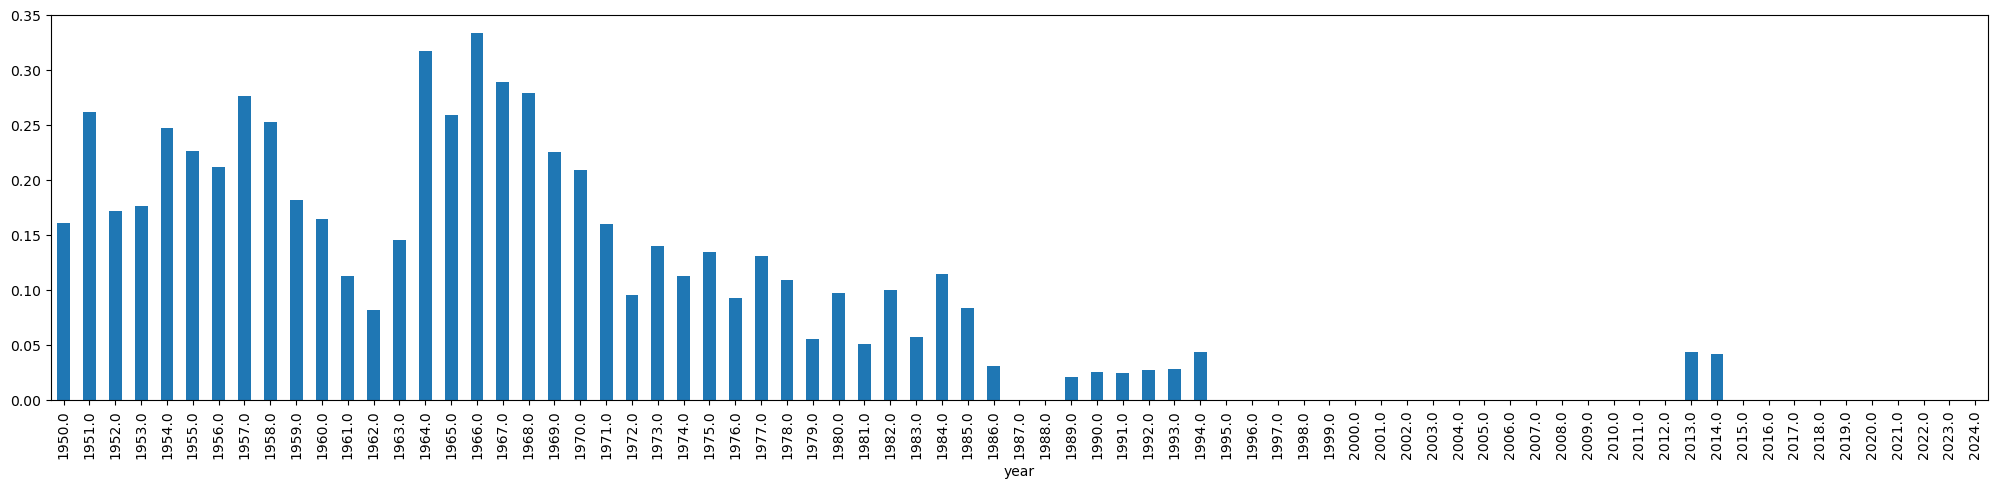

In [409]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*5), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

In [411]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*10), unit='d'))].groupby(['gp','year'])['name'].nunique() / results.groupby(['gp','year'])['name'].nunique()).nlargest(5)

gp                 year  
Monaco Grand Prix  1966.0    0.562500
                   1968.0    0.555556
French Grand Prix  1957.0    0.533333
                   1967.0    0.533333
Dutch Grand Prix   1966.0    0.529412
Name: name, dtype: float64

In [412]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25*5), unit='d'))].groupby(['gp','year'])['name'].nunique() / results.groupby(['gp','year'])['name'].nunique()).nlargest(5)

gp                    year  
French Grand Prix     1957.0    0.533333
Argentine Grand Prix  1957.0    0.500000
                      1958.0    0.500000
Monaco Grand Prix     1967.0    0.473684
Dutch Grand Prix      1967.0    0.470588
Name: name, dtype: float64

In [413]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25), unit='d'))].groupby(['gp','year'])['name'].nunique() / results.groupby(['gp','year'])['name'].nunique()).nlargest(5)

gp                    year  
Belgian Grand Prix    1967.0    0.222222
Dutch Grand Prix      1958.0    0.222222
Belgian Grand Prix    1958.0    0.210526
Argentine Grand Prix  1958.0    0.200000
French Grand Prix     1967.0    0.200000
Name: name, dtype: float64

<Axes: xlabel='year'>

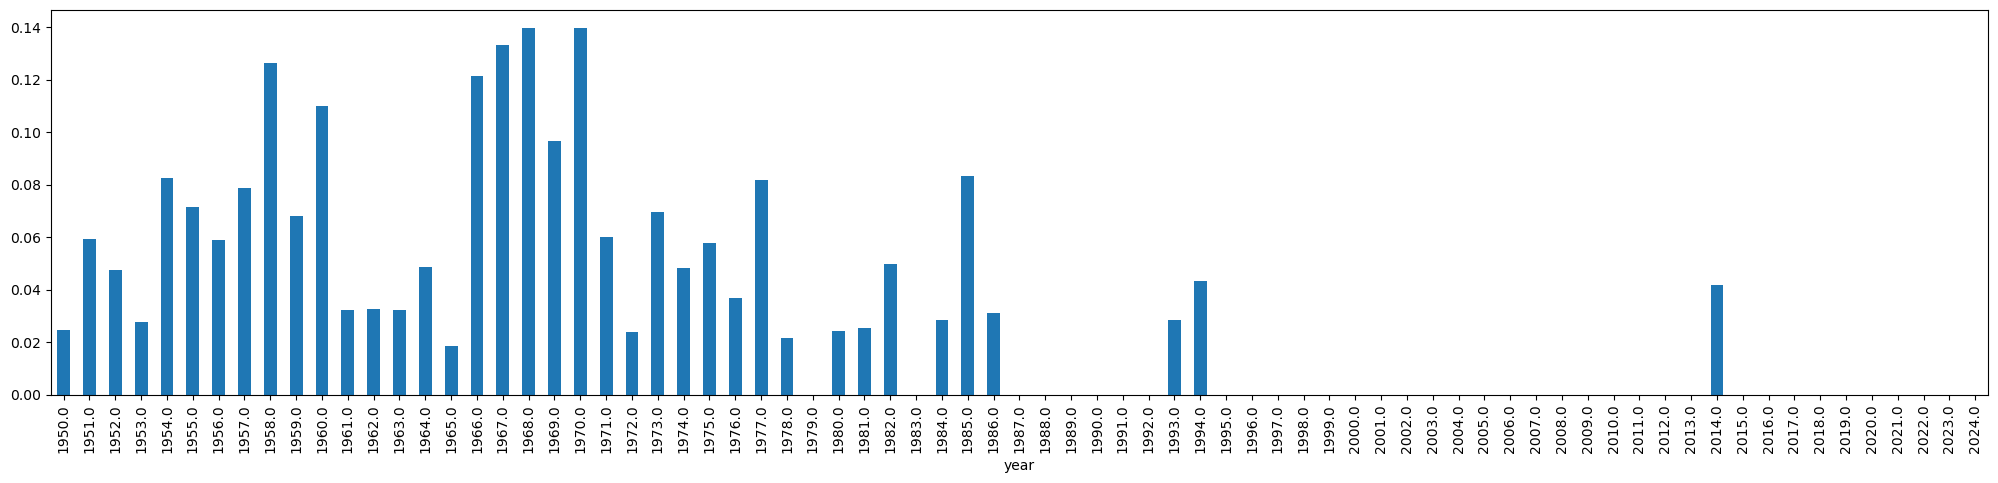

In [414]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

In [415]:
results['manner_of_death'].drop_duplicates()

0                           None
2               accidental death
1771              natural causes
9071                     suicide
9732                    homicide
18073    1967 British Grand Prix
19479    Graham Hill plane crash
21510           Formula One race
26320                        NaN
Name: manner_of_death, dtype: object

In [416]:
sad = ['accidental death','Graham Hill plane crash','1967 British Grand Prix','Formula One race']

In [417]:
results[results['manner_of_death'] == 'homicide'][['name','date_of_death']].drop_duplicates()

,name,date_of_death
9732,Jackie Pretorius,2009-03-30
10727,Ricardo Londoño,2009-07-18


In [418]:
results[results['manner_of_death'] == 'suicide'][['name','date_of_death']].drop_duplicates()

,name,date_of_death
9071,Willy Mairesse,1969-09-02
9213,Hap Sharp,1993-05-07


In [419]:
import datetime

In [420]:
today = datetime.date.today()
today

datetime.date(2024, 3, 19)

In [421]:
def total_age(dod, dob):
    if dob:
        if str(dod) != "NaT":
            return dod - dob
        else:
            return pd.to_datetime(today) - dob
    else:
        return None

In [422]:
results['lived_until'] = results.apply(lambda row: total_age(row['date_of_death'], row['date_of_birth']), axis = 1)

In [423]:
results[['full_name','date_of_birth','date_of_death','lived_until']].drop_duplicates().sort_values(by='lived_until')

,full_name,date_of_birth,date_of_death,lived_until
1371,Oliver Bearman,2005-05-08,NaT,6890 days
8934,Ricardo Rodríguez de la Vega,1942-02-14,1962-11-01,7565 days
12685,Peter Ryan,1940-06-10,1962-07-02,8057 days
21358,Liam Lawson,2002-02-11,NaT,8072 days
9874,Chris Bristow,1937-12-02,1960-06-19,8235 days
...,...,...,...,...
9891,Leslie Marr,1922-08-14,2021-05-04,36058 days
21451,Paul Pietsch,1911-06-20,2012-05-31,36871 days
10405,Kenneth McAlpine,1920-09-21,2023-04-08,37454 days
17305,Clemar Bucci,NaT,2011-01-12,NaT


<Axes: xlabel='year'>

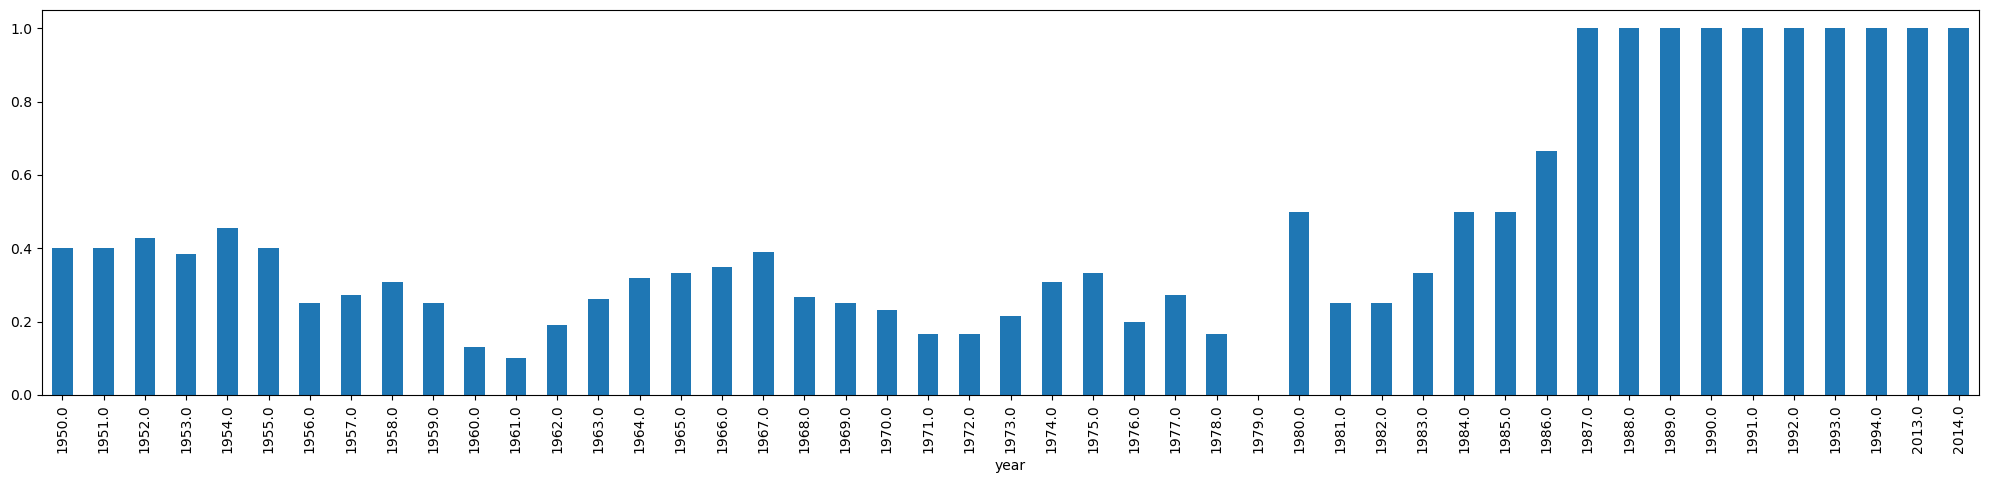

In [424]:
pd.Series(results[(results['manner_of_death'].isin(sad))].groupby('year')['name'].nunique() / results[~(results['manner_of_death'].isnull())].groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))

<Axes: xlabel='year'>

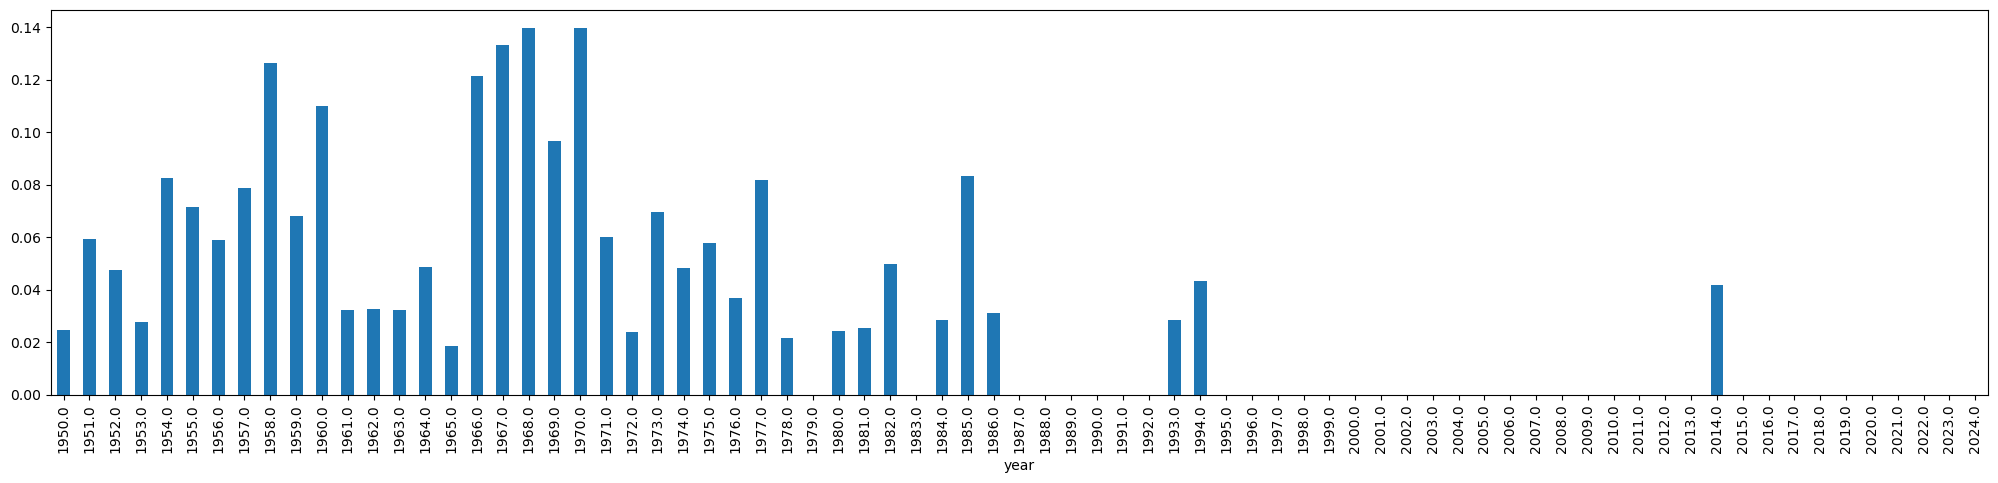

In [425]:
pd.Series(results[(results['life_remaining'] < pd.Timedelta((365.25), unit='d'))].groupby('year')['name'].nunique() / results.groupby('year')['name'].nunique()).plot.bar(figsize=(25,5))